In [1]:
cd ..

/Users/yanndubois/SSL-Risk-Decomposition


In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Collect all results

In [4]:
import torch
import pandas as pd
from utils.plotting import *
from utils.collect_results import *
import warnings
import logging
import hubconf

metadata_df = hubconf.metadata_df(is_multiindex=False)
results = load_all_results()
check_missing(results, metadata_df)
results = format_approx_results(results, metadata_df, f_replace_arch=f_replace_arch)
results = make_risk_decomposition(results, traverse_path=["down","right","down"], is_print=True)
base_pred = 'torch_linear_lr0.3_wdec1e-06_ep100_bs256'
results, metadata_df = clean_results(results, metadata_df, predictor=base_pred)
validate_results(results, metadata_df)

# filter out values that are suspiciously bad
to_del = ["clip_vitl14","clip_vitl14_px336","msn_vitl16_ep600"]
to_keep = [i for i in results.index.get_level_values("enc") if i not in to_del]
results = results.loc[to_keep]
metadata_df = metadata_df.loc[to_keep]

 No module named 'clip'


Found 461 result files to load.


Missing results for: msn_vitl16_ep600
Found missing supervised models for:


pred seed         arch
0   torch_momlinear_lr0.3_wdec1e-06_ep100_bs256  123   vitb32 cls
1   torch_momlinear_lr0.3_wdec1e-06_ep100_bs256  123  resnet50w64
2   torch_momlinear_lr0.3_wdec1e-06_ep100_bs256  123   vitl16 cls
3      torch_linear_lr0.3_wdec1e-06_ep100_bs256  125  resnet50w64
4      torch_linear_lr0.3_wdec1e-06_ep100_bs256  124  resnet50w64
5      torch_linear_lr0.3_wdec1e-06_ep100_bs256  123  resnet50w64
6      torch_linear_lr0.3_wdec1e-06_ep100_bs256  123   resnet50w4
7      torch_linear_lr0.3_wdec1e-06_ep100_bs256  125  resnet50w16
8      torch_linear_lr0.3_wdec1e-06_ep100_bs256  124  resnet50w16
9      torch_linear_lr0.3_wdec1e-06_ep100_bs256  123  resnet50w16
10     torch_linear_lr0.3_wdec1e-06_ep100_bs256  125   resnet50w4
11     torch_linear_lr0.3_wdec1e-06_ep100_bs256  124   resnet50w4
12     torch_linear_lr0.3_wdec1e-06_ep100_bs256  123   resnet50w4
13     torch_linear_lr0.3_wdec1e-06_ep100_bs256  123   resnet50w4
14     torch_linear_lr0.3_wdec1e-06_ep100_bs256  123    vitl7 cls
15     torch_linear_lr0.3_wdec1e-06_ep100_bs256  123    vitb4 cls
16     torch_linear_lr0.3_wdec1e-06_ep100_bs256  123   vith14 cls
17     torch_linear_lr0.3_wdec1e-06_ep100_bs256  123    vits8 cls

[usability] = [train_train] - [sup_train_train]
[probe_gen] = [train-cmplmnt-ntest_train-sbst-ntest] - [train_train]
[enc_gen] = [train_test] - [train-cmplmnt-ntest_train-sbst-ntest]


Found negative values:


agg_risk  usability  enc_gen  probe_gen  approx  \
enc                                                                           
dino_vitb16_extracts          29.630     -0.187    4.624     24.112   1.081   
mugs_vitb16_ep400_extractb    24.782     -2.716    5.280     14.526   7.692   

                            train_train  
enc                                      
dino_vitb16_extracts              0.894  
mugs_vitb16_ep400_extractb        4.976

The following results seem suspicously bad:


agg_risk
enc                                                    
beit_vitb16_pt22k                             89.418000
beit_vitl16_pt22k                             73.404002
densecl_rn50_200ep_mmselfsup                  55.194002
mocov2_rn50_ep200                             50.206000
mocov2_rn50_vissl                             52.370000
odc_rn50_440ep_mmselfsup                      52.600002
simclr_resnet50_dnone_e100_m2_headtnonesnone  50.286001
simsiam_rn50_bs256_ep100                      65.763998
simsiam_rn50_bs256_ep200_mmselfsup            61.746001
simsiam_rn50_bs512_ep100                      66.000003
speccl_bs384_ep100                            65.737998

The following models have very different original and evalauted performance:


enc
densecl_rn50_200ep_mmselfsup          18.534002
infomin_rn50_200ep                    14.601999
infomin_rn50_800ep                    11.832000
jigsaw_rn50                           11.338001
jigsaw_rn50_in22k                     16.225999
mae_vitb16                            14.024001
mae_vith14                            15.788001
mae_vitl16                            11.452000
mocov1_rn50_ep200                     28.100001
mocov2_rn50_ep200                     17.906000
mocov2_rn50_ep800                     15.173999
mocov2_rn50_vissl                     18.770000
relativeloc_rn50_70ep_mmselfsup       26.848001
rotnet_rn50_in1k                      13.036665
rotnet_rn50_in22k                     11.038001
simsiam_rn50_bs256_ep100              34.063998
simsiam_rn50_bs256_ep200_mmselfsup    31.586001
simsiam_rn50_bs512_ep100              34.100003
speccl_bs384_ep100                    32.707998
dtype: float64

The following results have some nan:


agg_risk  usability  enc_gen  probe_gen  approx  train_train
enc                                                                          
clip_rn50x16       18.570        NaN    2.203      3.718     NaN       12.649
clip_rn50x4        21.791        NaN    2.185      3.252     NaN       16.354
clip_rn50x64       16.086        NaN    2.025      5.814     NaN        8.248
dino_vits8_last    24.988        NaN    3.574      8.739     NaN       12.675
mae_vith14         39.188        NaN    4.116      0.819     NaN       34.253
msn_vitb4_ep300    20.346        NaN    5.418      2.028     NaN       12.900
msn_vitl7_ep200    22.168        NaN    6.050      5.241     NaN       10.877
simclr_rn50w4      32.166        NaN    3.574      2.385     NaN       26.207
swav_rn50w4        24.978        NaN    3.190      4.493     NaN       17.295

In [91]:
df = pd.concat([results,metadata_df], axis=1)
df = df.replace(dict(ssl_mode={"hierarchical contrastive": "hierarchical"}))
components = ["usability", "enc_gen", "probe_gen", "approx", "agg_risk"]
#non_core_params = ['date_published','top1acc_in1k_official','projection_nparameters']
core_params = ['objective','version','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection_arch']
minimal_params = ['objective','version','architecture','patch_size','z_dim','z_layer',"pretraining_data",'finetuning_data']
df_core = df.set_index(core_params)[results.columns]
df_minimal = df.set_index(minimal_params)[results.columns]

In [150]:
melted = melt(df)

In [92]:
#100-df.loc["speccl_bs384_ep100".lower(),"agg_risk"]

And so it is useful to think about how people chose how many epochs to train there models for. Typically researchers write papers about an SSL objective on a standard benchmark (say RN50 on Imagenet). And so the highest level choice is the benchmark (arch + data) and objective (those interact with one another in a non trivial way but this is not important for our case). Once THose 

## Controlled analysis: line curves
In the previous notebook we tried to analyse all models and components globally, now let us try considering the effect of specific more carefully.

### Effect of epochs
Let's analyze the effect of epochs in controlled settings.

**Hypothesis** from the ISSL perspective we know that training for longer gets more optimal representations and thus this should help both the usability and probe gen. The encoder gen will likely increase as there is more overfitting

In [186]:
def get_only_vary(df, varying_keys, all_keys, drop_cols=[]):
    """Return all results that only vary on some given features."""
    non_vary = [k for k in all_keys if k not in varying_keys]
    nunique = df[all_keys].reset_index().groupby(non_vary, dropna=False).nunique()
    indices = nunique.loc[(nunique[varying_keys] > 1).values].index
    selected = df.set_index(non_vary).loc[indices].reset_index()
    non_vary = [c for c in non_vary if selected[c].nunique() > 1 and c not in drop_cols]
    selected["non_vary"] = selected[non_vary].astype(pd.StringDtype()).fillna("NA").agg(' '.join, axis=1)
    return selected

In [188]:
df_epochs = melt(get_only_vary(df, ["epochs"], core_params, 
                               drop_cols=["year","optimizer","learning_rate", 'weight_decay','z_layer']))

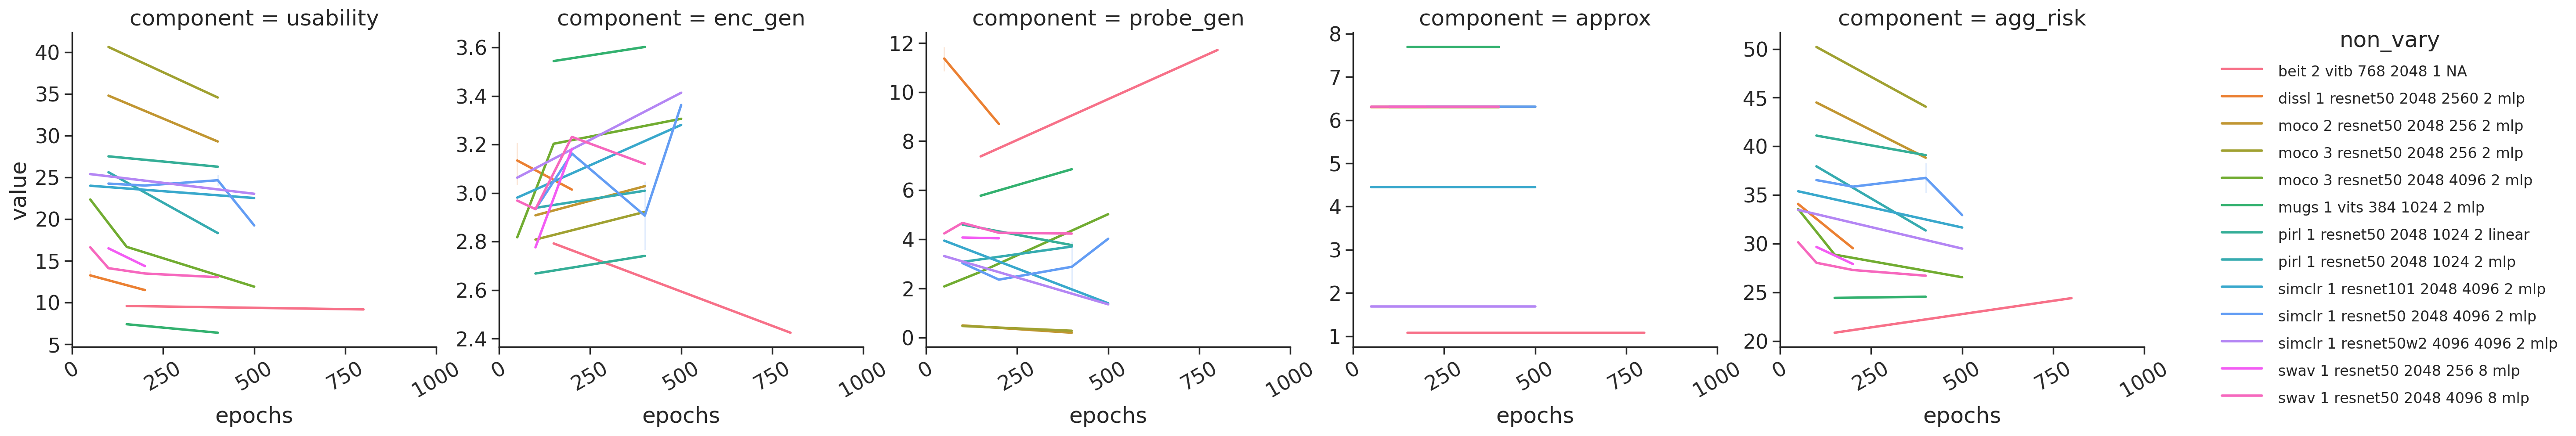

In [205]:
with plot_config():
    g = sns.relplot(data=df_epochs, x="epochs", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set_xticklabels(rotation=30)
    #sns.move_legend(g, "lower center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

In [100]:
ols_summary(df_epochs, "epochs")

                                  usability                                   
Dep. Variable:                  value   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     41.78
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           4.98e-12
Time:                        21:37:46   Log-Likelihood:                -65.266
No. Observations:                  35   AIC:                             158.5
Df Residuals:                      21   BIC:                             180.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

We see that training for one epoch improves usability by -0.0043 on average over controlled studies. 
Given that all other parameters are kept fixed and assuming that there are no confounders between who performed those experiments (and released models) and the treatment
effect, we can view this as a causal relation. For example increasing training by 400 epochs, would improve usability by an estimated $1.72 \pm 0.4$ points, and the overall performance
by $1.44 \pm 0.4$ points. Note that the p value is very small.

Another reason why this can be viewed causally is that most papers from groups with much compute provides models at different epochs regardless of the hyperparameters.

One natural question is whether the linear assumption holds. Why would increasing epochs modify the error in absolute terms rather than, say, relative terms (percentages). To test that let us regress the log outcome.

In [149]:
ols_summary(df_epochs, "epochs", outcome="np.log(value)")

                                  usability                                   
Dep. Variable:          np.log(value)   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     45.91
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.95e-12
Time:                        22:32:14   Log-Likelihood:                 38.406
No. Observations:                  35   AIC:                            -48.81
Df Residuals:                      21   BIC:                            -27.04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

We see that such relation is still highly statistically significant. The issue is that for most models we only have 2 values and thus it is hard to know whether the dependence is relative or absolute.

### Effect of batch size
Let's analyze the effect of batch size in controlled settings

**Hypothesis** increasing the batch size should might have different impact on diffferent types of ssl models. For contrastive and clustering it will generally improve the estimation of the objective which should improve usability and probe gen. But increasing batch size also decreases the number of steps which will decrease the previous two. So it will likely have better effect for longer epochs but unclear effects when small epochs. I.e. need to controll for epochs and ssl_mode. Finally, increasing batch size might help overfitting => decrease encoder generalization.

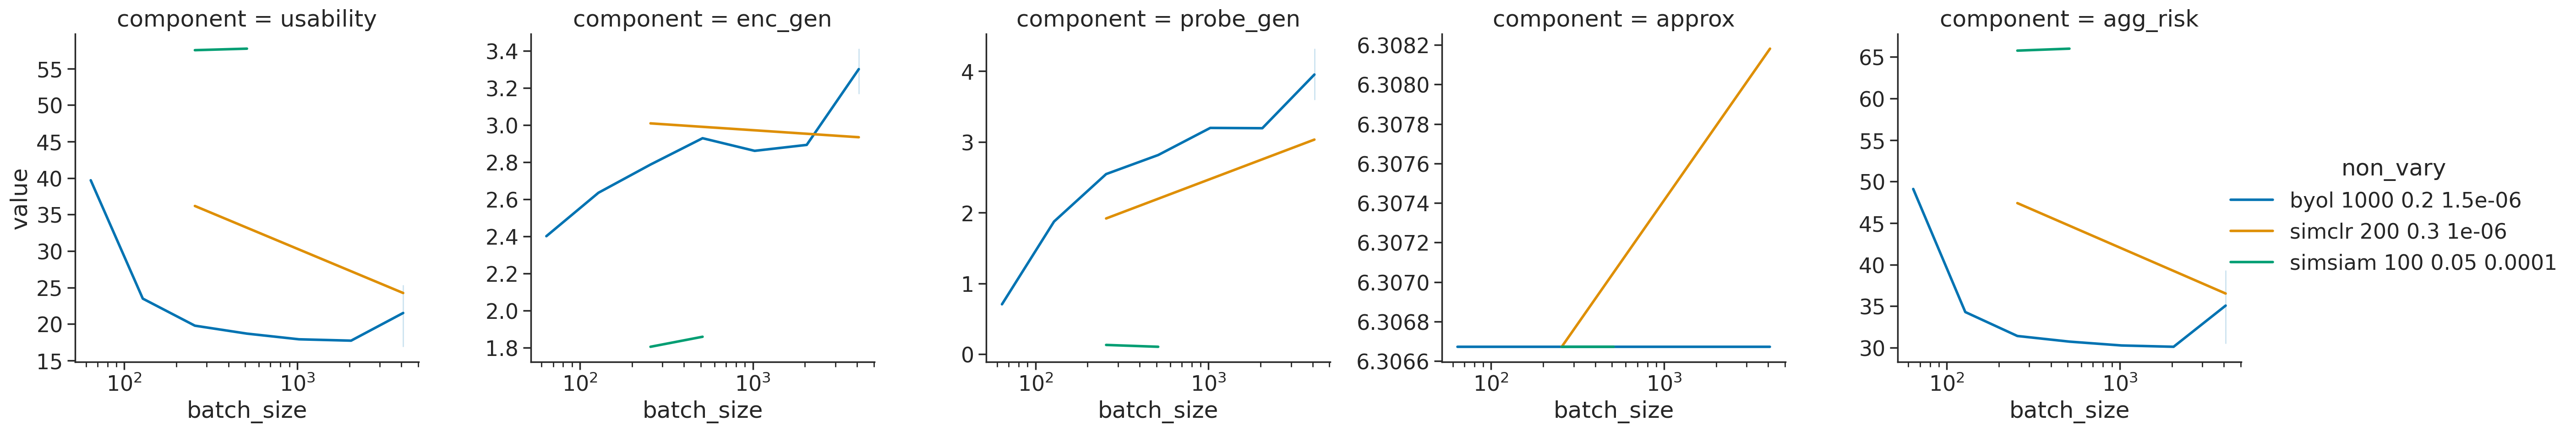

In [208]:
df_bs = melt(get_only_vary(df, ["batch_size"], core_params))

with plot_config():
    g = sns.relplot(data=df_bs, x="batch_size", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    #plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    

Although we don't have many data points, it seems that probing generalization worsens while usability improves. 

In [165]:
ols_summary(df_bs, "batch_size")

                                   enc_gen                                    
Dep. Variable:                  value   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     26.90
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.30e-05
Time:                        16:45:27   Log-Likelihood:                 5.2816
No. Observations:                  16   AIC:                            -2.563
Df Residuals:                      12   BIC:                            0.5272
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

kurtosistest only valid for n>=20 ... continuing anyway, n=16
kurtosistest only valid for n>=20 ... continuing anyway, n=16
kurtosistest only valid for n>=20 ... continuing anyway, n=16
kurtosistest only valid for n>=20 ... continuing anyway, n=16
kurtosistest only valid for n>=20 ... continuing anyway, n=16
kurtosistest only valid for n>=20 ... continuing anyway, n=16
kurtosistest only valid for n>=20 ... continuing anyway, n=16


### Effect of multicrops

Let's analyze the effect of batch size in controlled settings

**Hypothesis** More multicrops increases the invaraince => bettter generalization of the predictor and better usability (fewer equivalence classes). Generalization of the encoder is not clear: it might have more overfitting on that data.

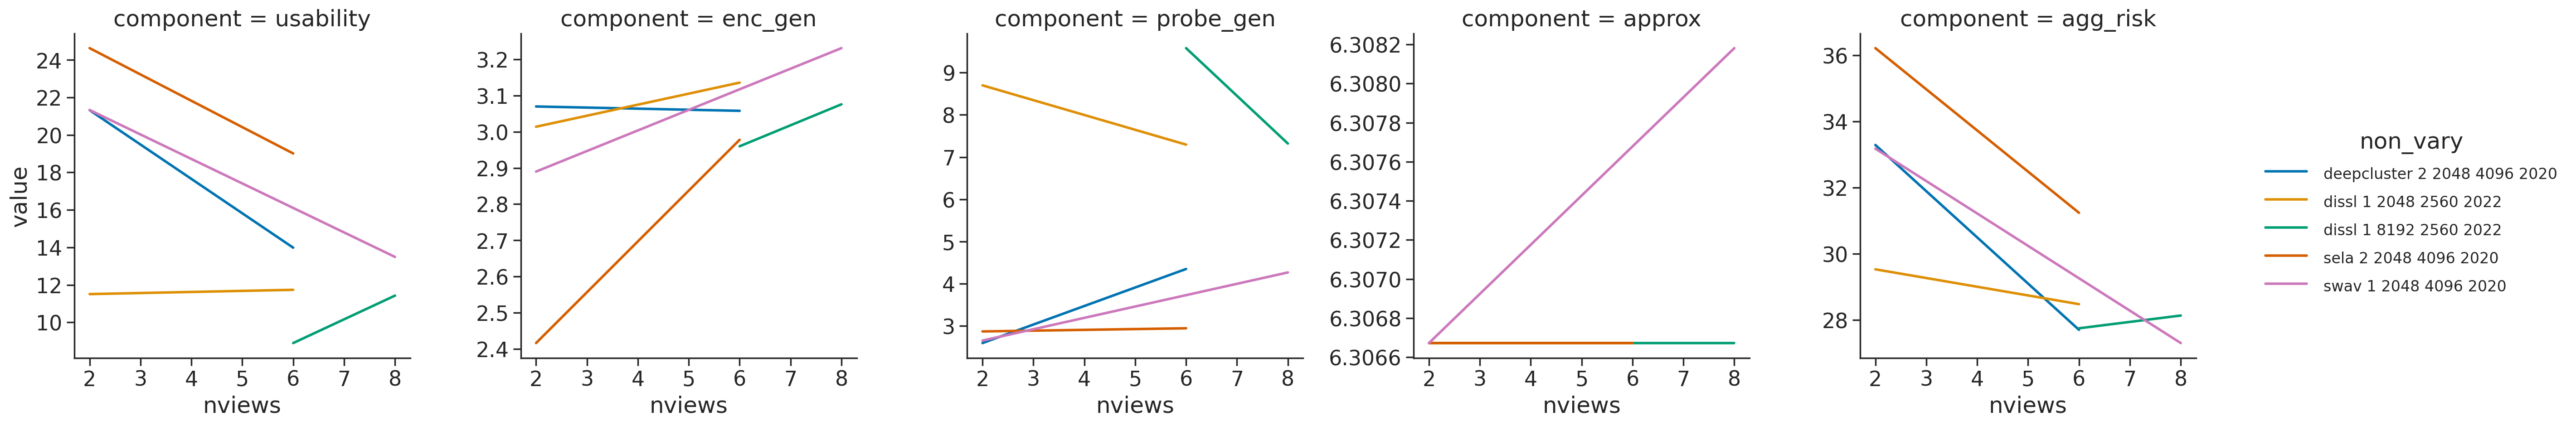

In [211]:
df_nviews = melt(get_only_vary(df, ["nviews"], core_params))

with plot_config():
    g = sns.relplot(data=df_nviews, x="nviews", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    #g.set(xscale="log")
    


In [171]:
ols_summary(df_nviews, "nviews")

                                   agg_risk                                   
Dep. Variable:                  value   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     6.964
Date:                Thu, 13 Oct 2022   Prob (F-statistic):             0.0418
Time:                        16:51:42   Log-Likelihood:                -13.473
No. Observations:                  10   AIC:                             38.95
Df Residuals:                       4   BIC:                             40.76
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

kurtosistest only valid for n>=20 ... continuing anyway, n=10
kurtosistest only valid for n>=20 ... continuing anyway, n=10
kurtosistest only valid for n>=20 ... continuing anyway, n=10
kurtosistest only valid for n>=20 ... continuing anyway, n=10
kurtosistest only valid for n>=20 ... continuing anyway, n=10
kurtosistest only valid for n>=20 ... continuing anyway, n=10


### Effect of dimensionality

Let's analyze the effect of dimensionality in controlled settings

**Hypothesis** Higher dimensionality should increase usability but decrease generalization of the probe. Encoder generalization is not very clear.

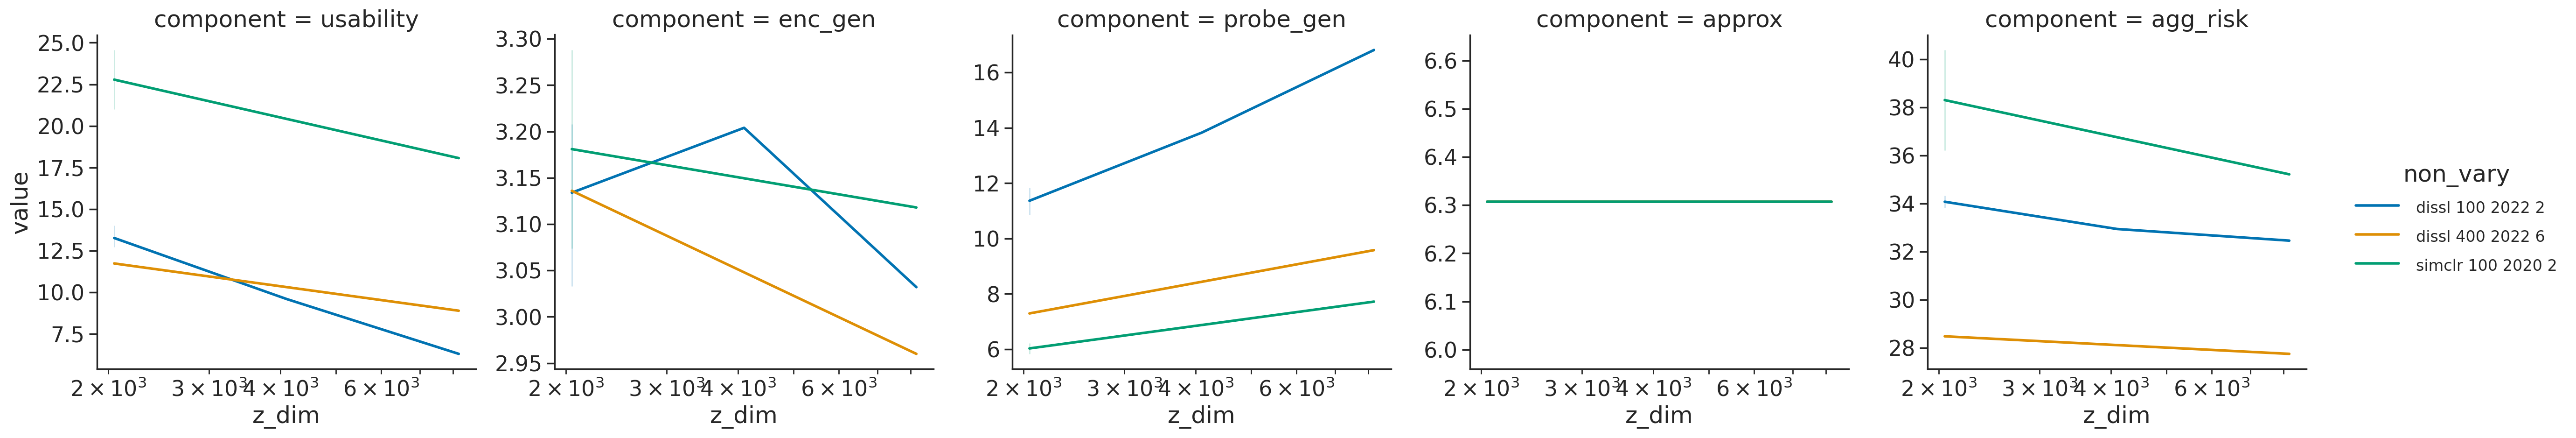

In [218]:
df_zdim = melt(get_only_vary(df, ["z_dim"], core_params))

with plot_config():
    g = sns.relplot(data=df_zdim, x="z_dim", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

In [219]:
ols_summary(df_zdim, "z_dim")

                                  usability                                   
Dep. Variable:                  value   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     41.85
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           7.72e-05
Time:                        17:10:51   Log-Likelihood:                -17.437
No. Observations:                  11   AIC:                             42.87
Df Residuals:                       7   BIC:                             44.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11


Just as hypothesized, the effect of probe generalization and suability are (the only) significant. For example we see that increasing representation dimensionality from 2000 to 8000 is predicted to improve usability by a huge $5.4$ points but decrease generalization by $3.6$ with a total gain of $1.8$.

Note that directly modifying the diemsnionality was not common under ISSL, but there are two other ways that researchers have indirectly been modifying the representation dimensionality. 

The first one is mostly done in ViT and consists of concatenating representations from different layers of a model. Let us analyse the effect of such dimensionality modification under the assumption that concatenating only impacts dimensionality.

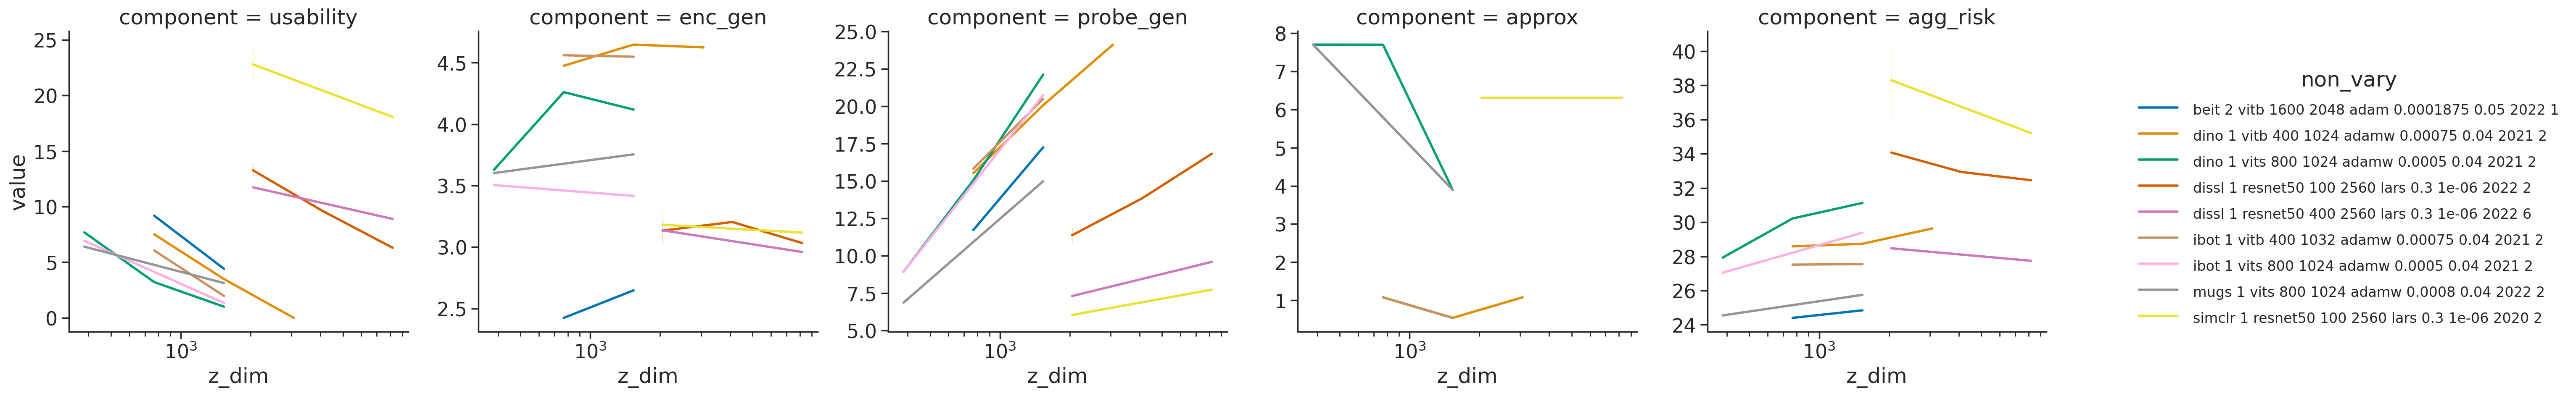

In [311]:
df_zlayer = melt(get_only_vary(df, ["z_dim","z_layer"], core_params, drop_cols=["pretraining_data"]))
#df_zlayer = df_zlayer[df_zlayer.family == "vit"]

with plot_config():
    g = sns.relplot(data=df_zlayer, x="z_dim", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

In [312]:
ols_summary(df_zlayer, "z_dim")

                                  usability                                   
Dep. Variable:                  value   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     28.26
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           5.13e-12
Time:                        01:04:19   Log-Likelihood:                -77.913
No. Observations:                  39   AIC:                             175.8
Df Residuals:                      29   BIC:                             192.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

We see that the the effect of changing the dimensionality due to concatenation has the same effect as changing directly the dimensionality but stronger, which suggests that concatenating is just a cheap way of increasing dimensionality.

Another indirect way researchers increase dimensionality is by using resnets of different widths, this is tyipically motivated by increasing the number of parameters of a model but also has an effect on the dimensionality of the representations.


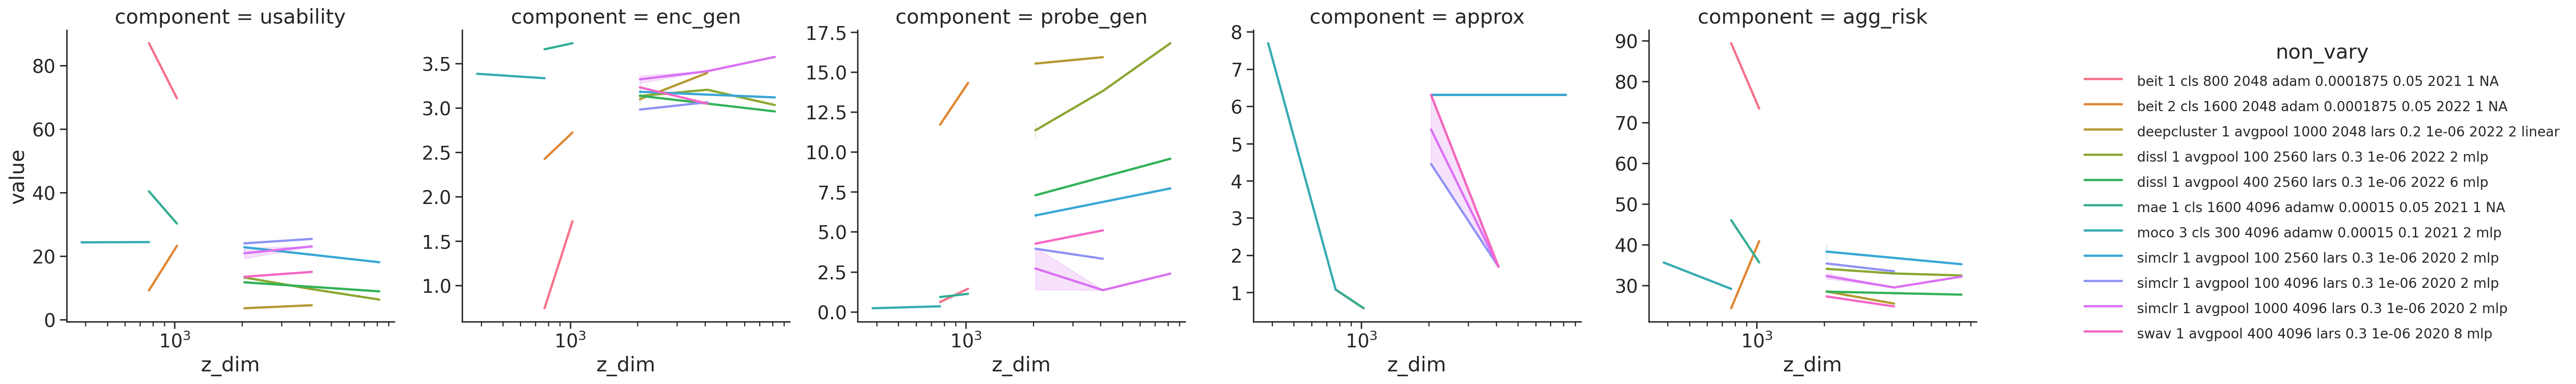

In [313]:
df_zdimarch = melt(get_only_vary(df, ["z_dim","architecture"], core_params, drop_cols=["pretraining_data"]))

with plot_config():
    g = sns.relplot(data=df_zdimarch, x="z_dim", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

In [314]:
ols_summary(df_zdimarch, "z_dim")

                                  probe_gen                                   
Dep. Variable:                  value   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           3.72e-24
Time:                        01:04:22   Log-Likelihood:                -60.867
No. Observations:                  47   AIC:                             145.7
Df Residuals:                      35   BIC:                             167.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

### Effect of architecture

Now let us look more specifically at the general effect of the architecture.

#### Size
First let us consider the effect of the size of the architecture

**Hypothesis** Larger architectures should first and foremost decrease the approximation gap. Furthermore larger models typically have larger diemnsionality and thus from the previous paragraph we hypothesize that the probing generalization should worsen and the usability should improve.

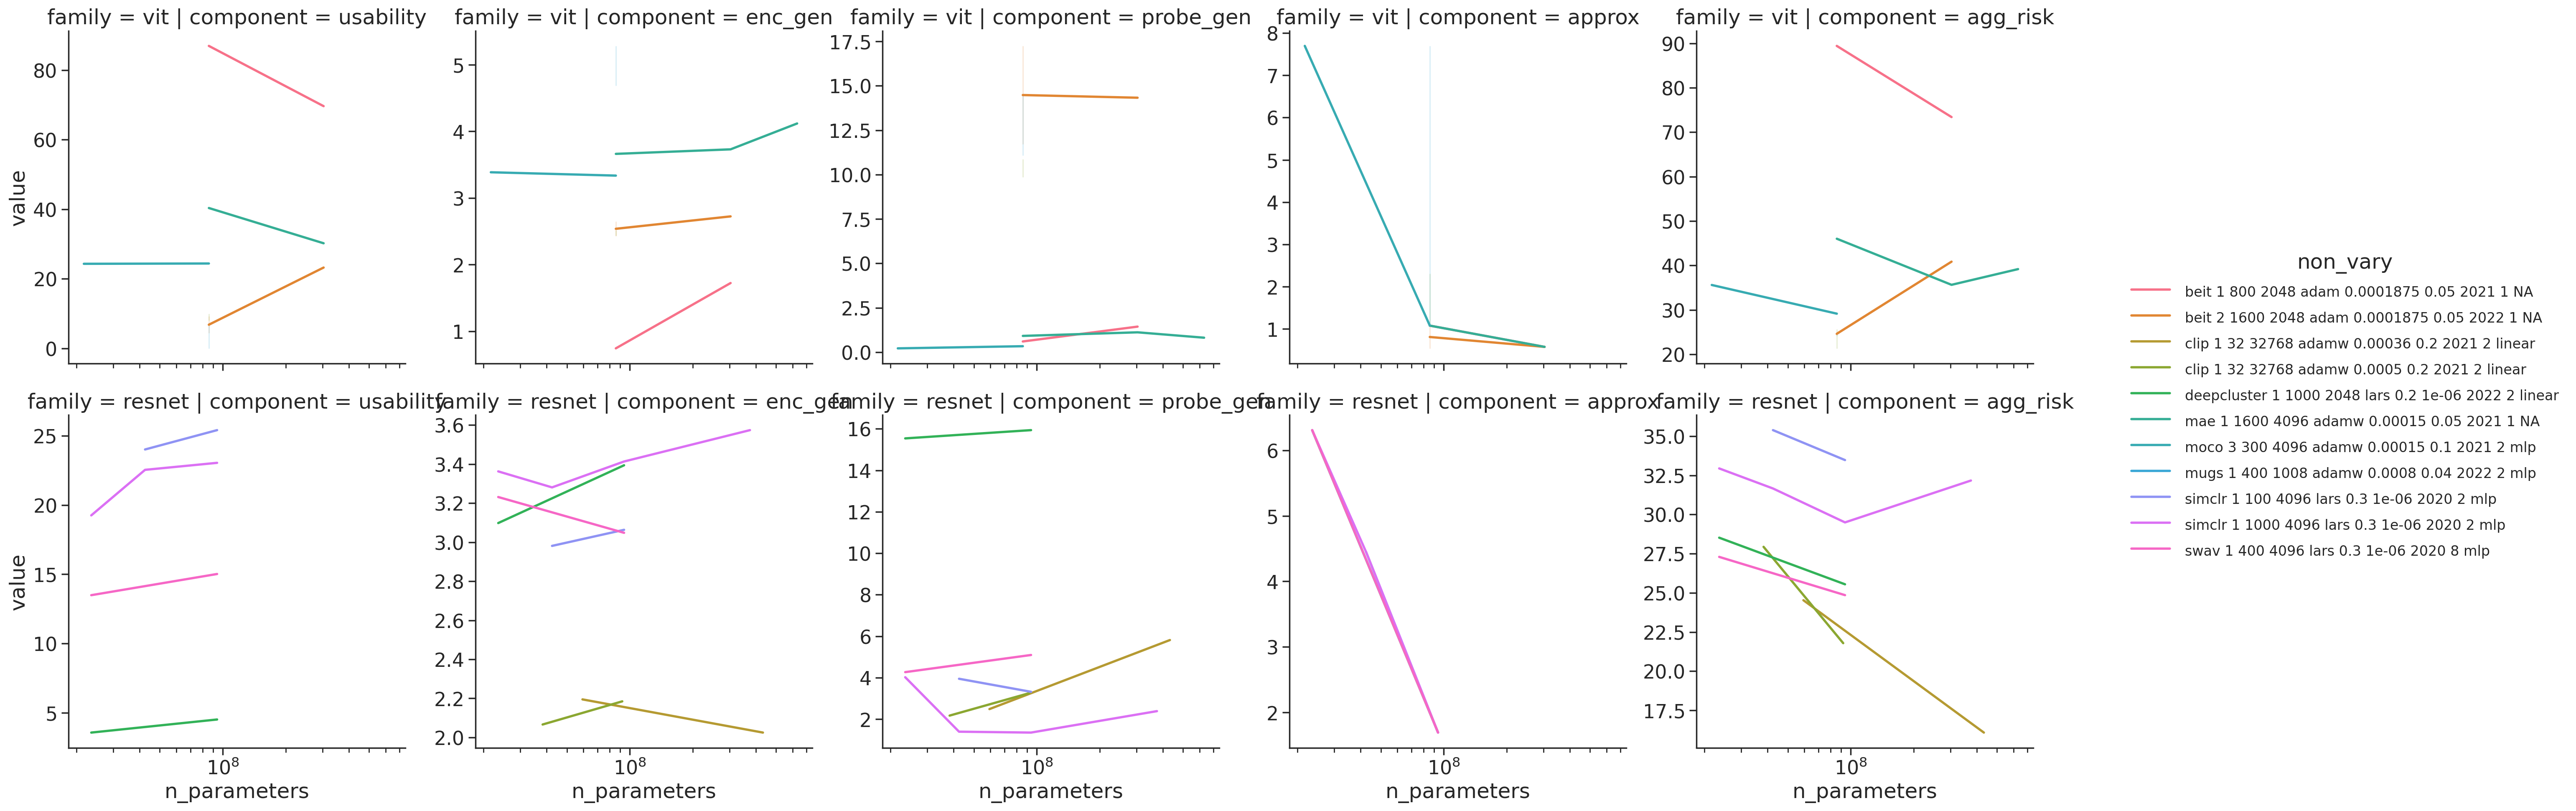

In [315]:
disregard = ["img_size","z_layer","patch_size","z_dim"]
df_arch = melt(get_only_vary(df.drop(columns=disregard), 
                             ["architecture"], 
                             [c for c in core_params if c not in disregard],
                              drop_cols=["pretraining_data"]))
#df_arch.n_parameters = df_arch.n_parameters // int(5e6) * int(5e6)

with plot_config():
    g = sns.relplot(data=df_arch, x="n_parameters", y="value", hue="non_vary", col="component", row="family", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

We see that the clearest effect is for the approximation gap which decreases drastically for larger models. Note that it is not clear whether the effect of number of parameters is linear and so the following analysis is not great.

In [316]:
ols_summary(df_arch, "n_parameters")

                                   enc_gen                                    
Dep. Variable:                  value   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     37.66
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           2.55e-09
Time:                        01:04:29   Log-Likelihood:                 9.4800
No. Observations:                  28   AIC:                             5.040
Df Residuals:                      16   BIC:                             21.03
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

We see that that when using a linear relationship approximation does not seem meaningfull, lewt us instead use log number of parameters as in the above plots. 

In [319]:
ols_summary(df_arch, "n_parameters", condition="non_vary + np.log10({treatment})")

                                    approx                                    
Dep. Variable:                  value   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     2.302
Date:                Fri, 14 Oct 2022   Prob (F-statistic):             0.0838
Time:                        13:21:13   Log-Likelihood:                -42.201
No. Observations:                  24   AIC:                             108.4
Df Residuals:                      12   BIC:                             122.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

We now have that the number of parameters has a high impact on the approximation gap, as expected. In particular we have that increasing the log10 parameters by one, i.e., multiplying the number parameters by 10 will improve approximation by $\approx-6$. 

#### ViT vs ResNet
Now that we have considered the effect of number of parameters, let us consider the effect of using ViT vs ResNet

**Hypothesis** This is very hard to say, but the encoder generalization likely worsen when going to ViT while approx error probably improves.

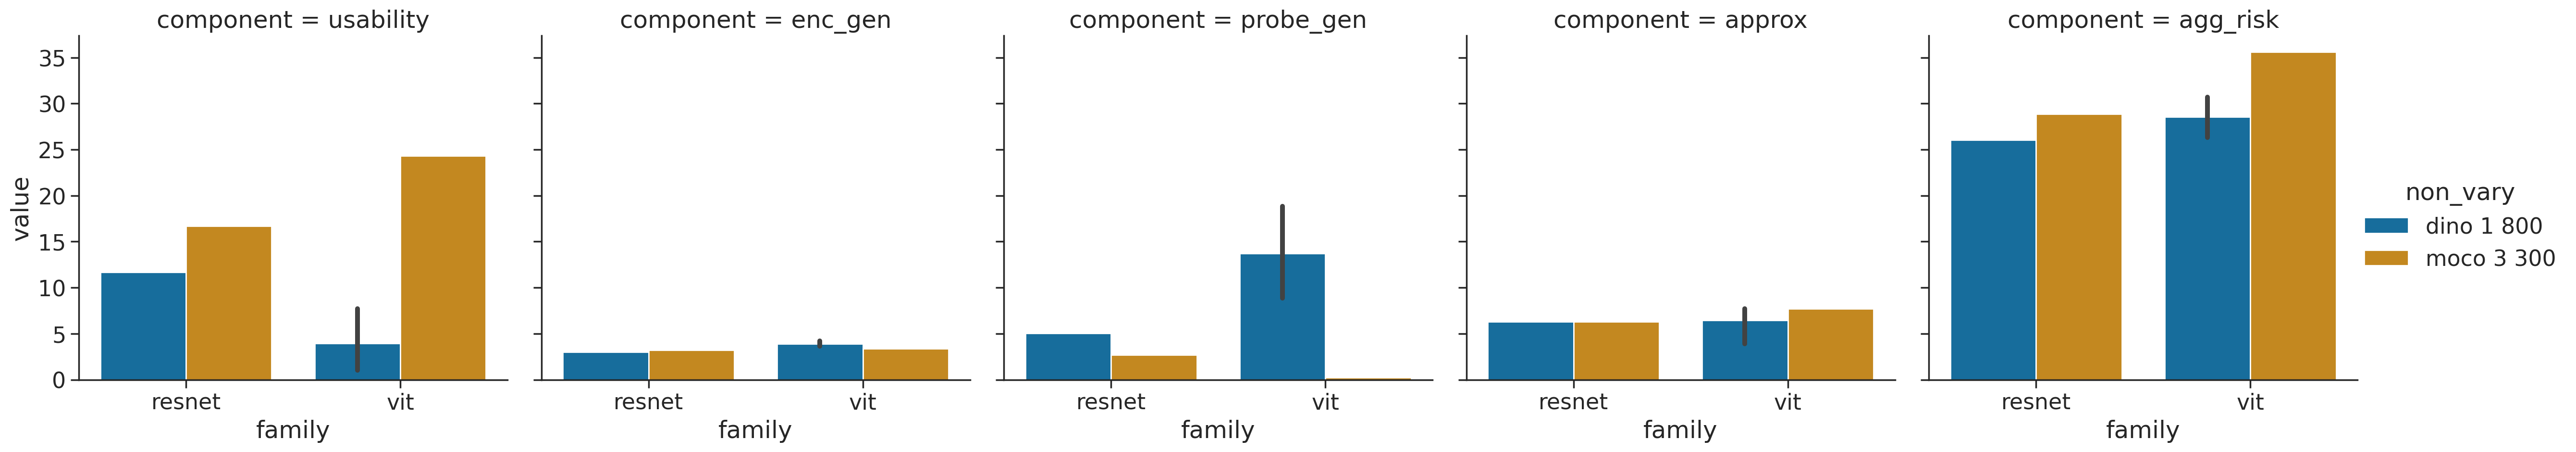

In [389]:
curr_df = df.copy()
curr_df.n_parameters = curr_df.n_parameters // int(30e6) * int(30e6) # coarse grains

df_family = melt(get_only_vary(curr_df, ["family"],  ["family","objective","n_parameters","version","epochs"]))


with plot_config():
    g = sns.catplot(data=df_family, x="family", y="value", hue="non_vary", col="component", kind="bar",
                    facet_kws={'sharey': False})
    #plt.setp(g._legend.get_texts(), fontsize=12)

In [390]:
ols_summary(df_family, "family")

omni_normtest is not valid with less than 8 observations; 6 samples were given.
omni_normtest is not valid with less than 8 observations; 7 samples were given.
omni_normtest is not valid with less than 8 observations; 7 samples were given.
omni_normtest is not valid with less than 8 observations; 6 samples were given.
omni_normtest is not valid with less than 8 observations; 7 samples were given.


We see that there seems to be nothing significative, most likely because we only have 2 models that are trained on RN and ViT. This will likely be more conclusive when performing causal analysis. Note furethermore that there are other parameters (training hyperparameters) that we did not control.

#### Effect of patch size

Another important component of architecture that is not taken into account by number ofa parameters and family, is the patch size of ViT. 

**Hypothesis** This is very hard to say, but the encoder generalization likely worsen when going to ViT while approx error probably improves.

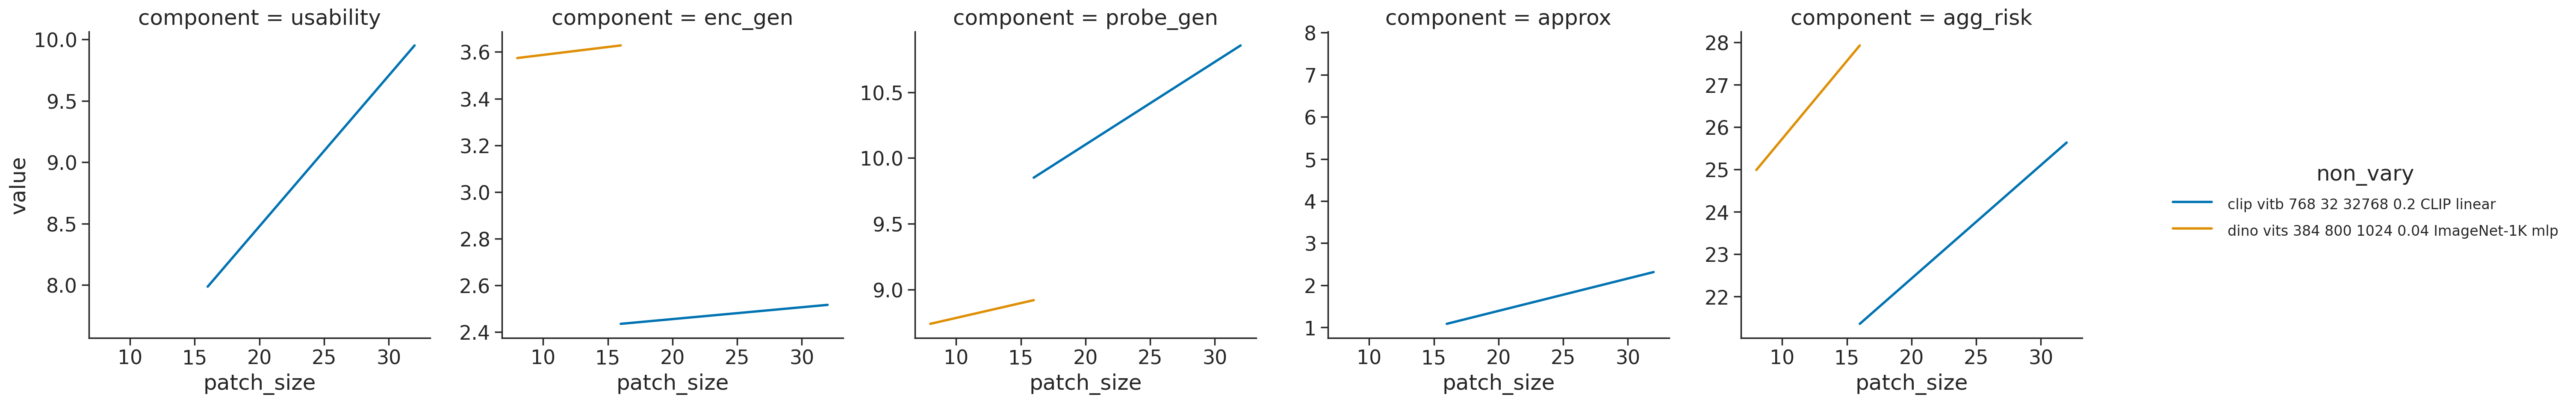

In [430]:
df_patch = melt(get_only_vary(df, ["patch_size"],  core_params+["patch_size"], drop_cols=["data"]))#,

with plot_config():
    g = sns.relplot(data=df_patch, x="patch_size", y="value", hue="non_vary", col="component", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)

In [431]:
df_patch.patch_size = df_patch.patch_size.astype("int")
ols_summary(df_patch, "patch_size")

                                  usability                                   
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.764e+29
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           4.20e-45
Time:                        16:14:20   Log-Likelihood:                 195.82
No. Observations:                   6   AIC:                            -385.6
Df Residuals:                       3   BIC:                            -386.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

omni_normtest is not valid with less than 8 observations; 6 samples were given.
omni_normtest is not valid with less than 8 observations; 6 samples were given.
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
omni_normtest is not valid with less than 8 observations; 6 samples were given.
omni_normtest is not valid with less than 8 observations; 6 samples were given.
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8


We see that the aggregated performance significantly improves with smaller patch_size on all components! 

### Effect of projection 

Another hyperparameter that people have found to be very important is the architecture of the projection head.

**Hypothesis**: from ISSL we know that non linear projection heads on only branch can help optimization of the representations (usability and probing generalization), but on both sides they do not ensure linear predictability anymore (drop on usability). 

#### Architecture

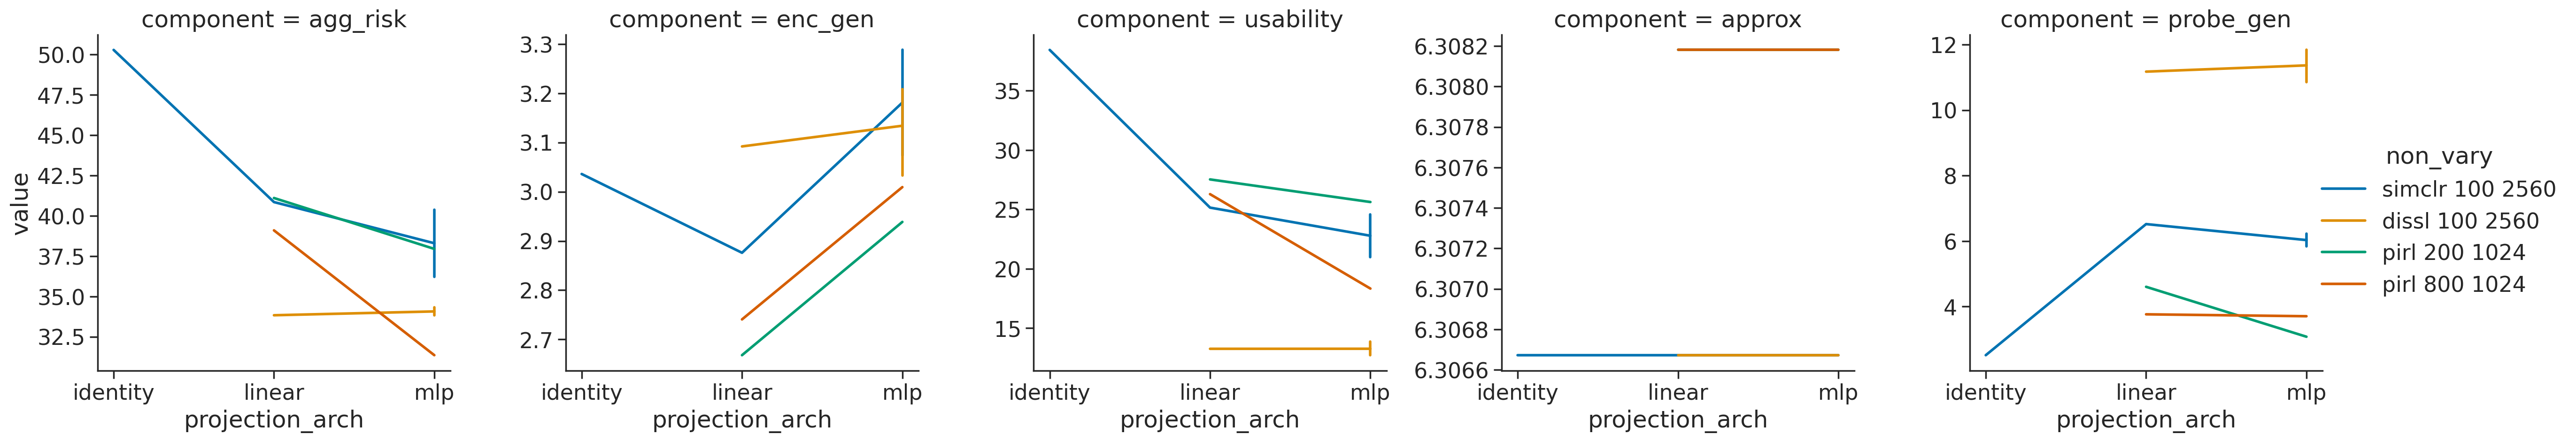

In [434]:
df_proj = melt(get_only_vary(df, ["projection_arch"], core_params, 
                            drop_cols=["year","optimizer","learning_rate", 'weight_decay']))

with plot_config():
    g=sns.relplot(data=df_proj.sort_values("projection_arch"), x="projection_arch", y="value", hue="non_vary", 
                  kind="line", col="component", facet_kws={'sharey': False}, err_style="bars")
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

In [435]:
ols_summary(df_proj, "projection_arch")

                                  usability                                   
Dep. Variable:                  value   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     35.46
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           7.93e-05
Time:                        16:31:40   Log-Likelihood:                -23.399
No. Observations:                  13   AIC:                             58.80
Df Residuals:                       7   BIC:                             62.19
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

kurtosistest only valid for n>=20 ... continuing anyway, n=13
kurtosistest only valid for n>=20 ... continuing anyway, n=13
kurtosistest only valid for n>=20 ... continuing anyway, n=13
kurtosistest only valid for n>=20 ... continuing anyway, n=13
kurtosistest only valid for n>=20 ... continuing anyway, n=13
kurtosistest only valid for n>=20 ... continuing anyway, n=13
kurtosistest only valid for n>=20 ... continuing anyway, n=13
kurtosistest only valid for n>=20 ... continuing anyway, n=13


We see that usability improves while probe gen worsen's.
One issues is that with simclr and dissl we don't actually differentiate between proj of the teacher or student.
Let's consider the more fine grained now.

In [437]:
dissl_proj = ["dissl_resnet50_dNone_e100_m2_headTMlpSMlp","dissl_resnet50_dNone_e100_m2_headTLinSLin","dissl_resnet50_dNone_e100_m2"]
dissl_proj = [d.lower() for d in dissl_proj ]
df_dissl_proj = df.loc[df.index.isin(dissl_proj)]
df_dissl_proj[components]

usability   enc_gen  probe_gen  \
enc                                                                         
dissl_resnet50_dnone_e100_m2               12.793726  3.162000  11.431602   
dissl_resnet50_dnone_e100_m2_headtlinslin  13.260722  3.092000  11.172605   
dissl_resnet50_dnone_e100_m2_headtmlpsmlp  12.653385  2.989998  11.993943   

                                             approx   agg_risk  
enc                                                             
dissl_resnet50_dnone_e100_m2               6.306672  33.693999  
dissl_resnet50_dnone_e100_m2_headtlinslin  6.306672  33.831999  
dissl_resnet50_dnone_e100_m2_headtmlpsmlp  6.306672  33.943999

We see that for dissl it has little effect, with the best being the asummentric proposed in ISSL.

In [438]:
simclr_proj=df.query("`objective` == 'simclr' and `nviews` == 2 and `epochs`==100 and `z_dim` == 2048 and `architecture`=='resnet50'")
simclr_proj[components]

usability   enc_gen  probe_gen  \
enc                                                                            
simclr_resnet50_dnone_e100_m2                 21.113408  3.220001   5.865920   
simclr_resnet50_dnone_e100_m2_headtlinslin    25.148946  2.875999   6.518382   
simclr_resnet50_dnone_e100_m2_headtmlpslin    24.561200  3.288001   6.226128   
simclr_resnet50_dnone_e100_m2_headtmlpsmlp    20.999449  3.073999   5.833879   
simclr_resnet50_dnone_e100_m2_headtnonesnone  38.427621  3.036001   2.515706   

                                                approx   agg_risk  
enc                                                                
simclr_resnet50_dnone_e100_m2                 6.306672  36.506000  
simclr_resnet50_dnone_e100_m2_headtlinslin    6.306672  40.849999  
simclr_resnet50_dnone_e100_m2_headtmlpslin    6.306672  40.382001  
simclr_resnet50_dnone_e100_m2_headtmlpsmlp    6.306672  36.214000  
simclr_resnet50_dnone_e100_m2_headtnonesnone  6.306672  50.286001

We see that for simclr it has a large effect, with the best being by far MLP / MLP, and MLP/LIN giving little gains compared to LIN/LIN.

### Effect of data

Until now we have not talked about an important part of the SSL pipeline: the pretraining data. We investigate that now.

#### Effect of data percentage

First let us consider the effect of training on more data from the same distribution.

**Hypothesis** Training on more in distribution data should improve mostly encoder generalization. 

Unfortunately there will also be a mistake on how we evaluate because models that were trained on a subset of imagenet will actually have a encoder generalization component in the usability (because the training set of imagenet will now not have been seen). As a result we will actually likely see an improvement on usability and a **decrease** in encoder generalization when increasing the pretraining data (because usability now takes into account encoder generalization and so the delta will be smaller when compariong to pure encoder generalization). This is a very unfortunate problement which doesn't seem to have a simple solution, I think I will thus drop those risk decomposition results.

In [452]:
df_dataperc = melt(get_only_vary(df, ["pretraining_data"], core_params, 
                            drop_cols=[]))
# only select if taking percentages
df_dataperc = df_dataperc.loc[["%" in d for d in df_dataperc.pretraining_data],:]

if len(df_dataperc) > 0:
    with plot_config():
        g=sns.catplot(data=df_dataperc, x="pretraining_data", y="value", hue="non_vary", 
                      kind="bar", col="component", facet_kws={'sharey': False})
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

#### Effect of IN20k

Prewviously we saw the effect of the training size (percentage) now let us consider different datasets.

**hypothesis** if the distribution of the training set there will be some shift which will likely worst then encoder generalization. But at the same time if the data increases we will likely see better usability and probing generalization.

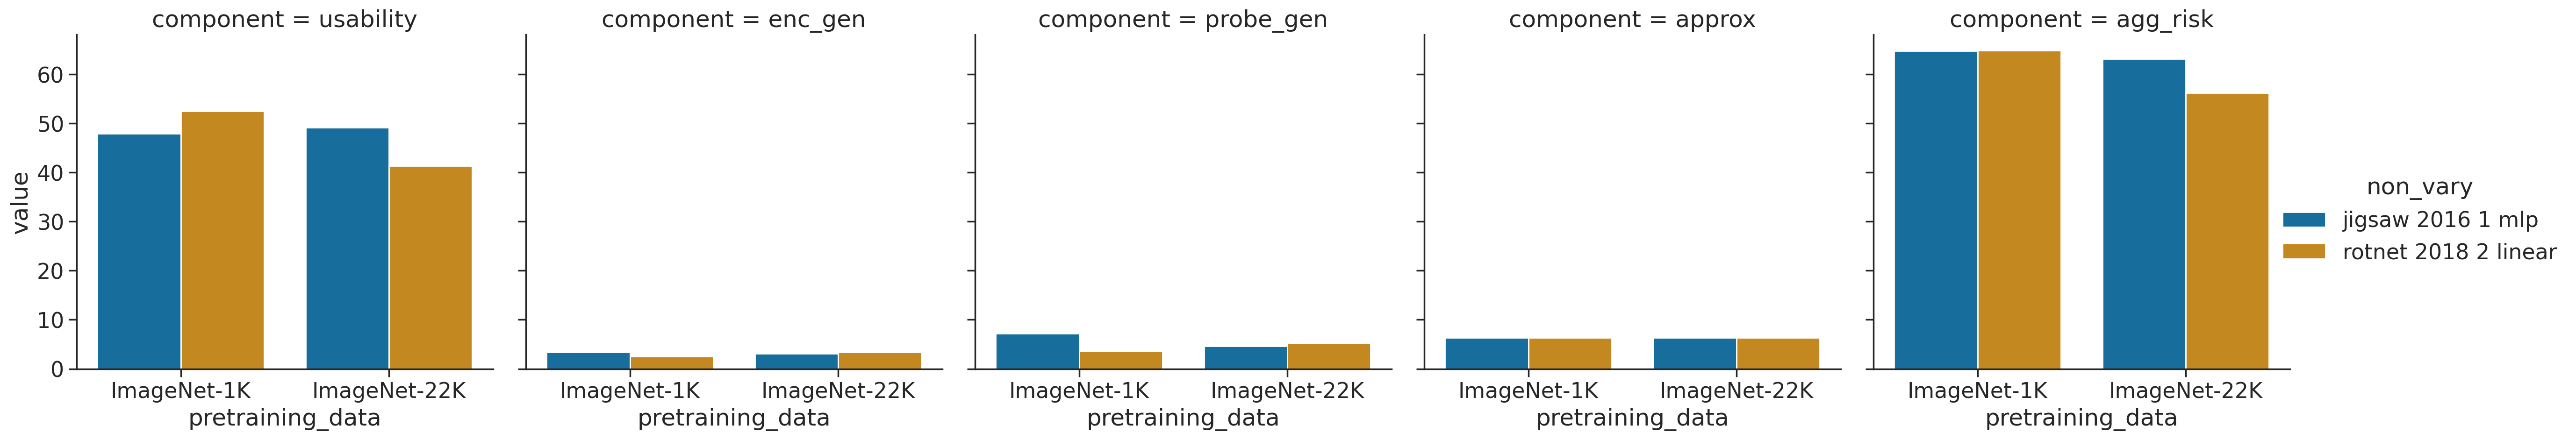

In [455]:
df_data = melt(get_only_vary(df, ["pretraining_data"], core_params, 
                            drop_cols=[]))
# only select if not taking percentages
df_dataperc = df_dataperc.loc[["%" not in d for d in df_dataperc.pretraining_data ],:]

if len(df_dataperc) > 0:
    with plot_config():
        g=sns.catplot(data=df_data, x="pretraining_data", y="value", hue="non_vary", 
                      kind="bar", col="component", facet_kws={'sharey': False})
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

In [456]:
ols_summary(df_data, "pretraining_data")

omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.


Although the trend are as predicted, we see that the results are not statistically significant, likely because we only have 2 models. THis will probably be solved once we do a general caussal discovery.

#### Effect of finetuning

In [473]:
curr_df = df.copy()
curr_df["is_finetuned"] = curr_df.finetuning_data.isna()
df_ft = melt(get_only_vary(curr_df, ["is_finetuned"], core_params+["is_finetuned"], 
                            drop_cols=[]))

if len(df_ft) > 0:
    with plot_config():
        g=sns.catplot(data=df_ft, x="is_fintetuned", y="value", hue="non_vary", 
                      kind="bar", col="component", facet_kws={'sharey': False})
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))